In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime 

# 1. Data Collection

In [3]:
now = datetime.now()

ticker = 'AAPL'
start = datetime(now.year-10, now.month, now.day)
end = now
df = yf.download(ticker, start, end)
df

C:\Users\josep\AppData\Local\Temp\ipykernel_14320\732389447.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-09-24,25.843441,25.955804,25.252413,25.450171,200878000
2015-09-25,25.778267,26.223224,25.623206,26.167043,224607600
2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000
2015-09-29,24.508572,25.508602,24.238902,25.355788,293461600
2015-09-30,24.787237,25.065896,24.434418,24.758022,265892000
...,...,...,...,...,...
2025-09-17,238.990005,240.100006,237.729996,238.970001,46508000
2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-09-24,25.843441,25.955804,25.252413,25.450171,200878000
2015-09-25,25.778267,26.223224,25.623206,26.167043,224607600
2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000
2015-09-29,24.508572,25.508602,24.238902,25.355788,293461600
2015-09-30,24.787237,25.065896,24.434418,24.758022,265892000


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-09-17,238.990005,240.100006,237.729996,238.970001,46508000
2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600
2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300
2025-09-22,256.079987,256.640015,248.119995,248.300003,105517400
2025-09-23,254.429993,257.339996,253.580002,255.880005,60232300


In [6]:
df.columns = [col[0] for col in df.columns]

In [7]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2015-09-24,25.843441,25.955804,25.252413,25.450171,200878000
2015-09-25,25.778267,26.223224,25.623206,26.167043,224607600
2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000
2015-09-29,24.508572,25.508602,24.238902,25.355788,293461600
2015-09-30,24.787237,25.065896,24.434418,24.758022,265892000
...,...,...,...,...,...
2025-09-17,238.990005,240.100006,237.729996,238.970001,46508000
2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600
2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.shape

(2514, 5)

In [10]:
# check for null
df.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [11]:
# Statistical overview
df.describe()

,Close,High,Low,Open,Volume
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,107.763632,108.839520,106.571905,107.657519,1.054412e+08
std,70.110330,70.790507,69.339005,70.028697,5.927298e+07
min,20.624056,20.927682,20.425441,20.546432,2.323470e+07
25%,40.456127,40.859899,40.221738,40.506799,6.490702e+07
50%,111.925766,113.370256,110.491032,111.998738,9.154940e+07
75%,168.599560,170.026524,167.062790,168.185660,1.293973e+08
max,258.103729,259.179926,256.718662,257.276679,5.334788e+08


In [12]:
df.dtypes

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [13]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

# 2. Data Exploration & Visualization

In [14]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2015-09-24,25.843441,25.955804,25.252413,25.450171,200878000
2015-09-25,25.778267,26.223224,25.623206,26.167043,224607600
2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000
2015-09-29,24.508572,25.508602,24.238902,25.355788,293461600
2015-09-30,24.787237,25.065896,24.434418,24.758022,265892000
...,...,...,...,...,...
2025-09-17,238.990005,240.100006,237.729996,238.970001,46508000
2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600
2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300


In [15]:
df.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [16]:
# Remove date as an index
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2015-09-24,25.843441,25.955804,25.252413,25.450171,200878000
1,2015-09-25,25.778267,26.223224,25.623206,26.167043,224607600
2,2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000
3,2015-09-29,24.508572,25.508602,24.238902,25.355788,293461600
4,2015-09-30,24.787237,25.065896,24.434418,24.758022,265892000


Text(0, 0.5, 'Close Price')

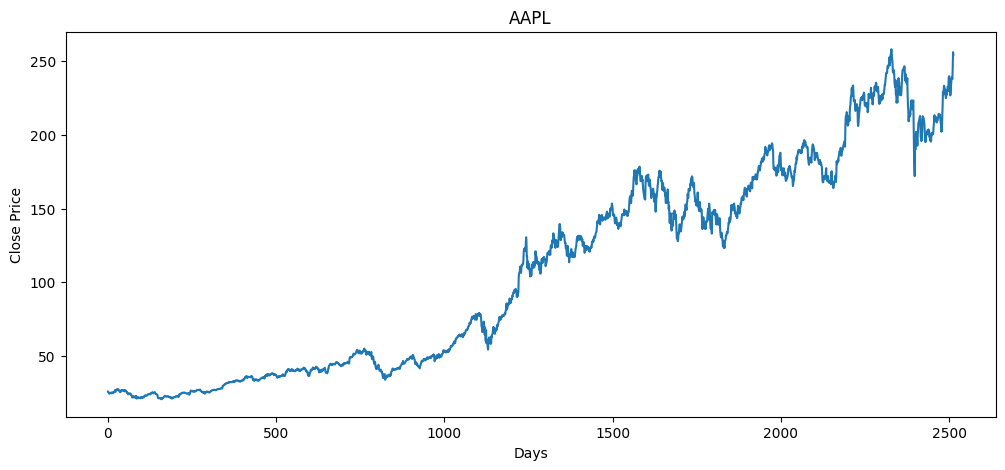

In [17]:
# Visualize the data
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# 3. Feature Engineering

### 100 Days Moving Average

In [18]:
df['MA_100'] = df.Close.rolling(100).mean()
df

,Date,Close,High,Low,Open,Volume,MA_100
0,2015-09-24,25.843441,25.955804,25.252413,25.450171,200878000,NaN
1,2015-09-25,25.778267,26.223224,25.623206,26.167043,224607600,NaN
2,2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000,NaN
3,2015-09-29,24.508572,25.508602,24.238902,25.355788,293461600,NaN
4,2015-09-30,24.787237,25.065896,24.434418,24.758022,265892000,NaN
...,...,...,...,...,...,...,...
2509,2025-09-17,238.990005,240.100006,237.729996,238.970001,46508000,213.095340
2510,2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600,213.386450
2511,2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300,213.745181
2512,2025-09-22,256.079987,256.640015,248.119995,248.300003,105517400,214.199038


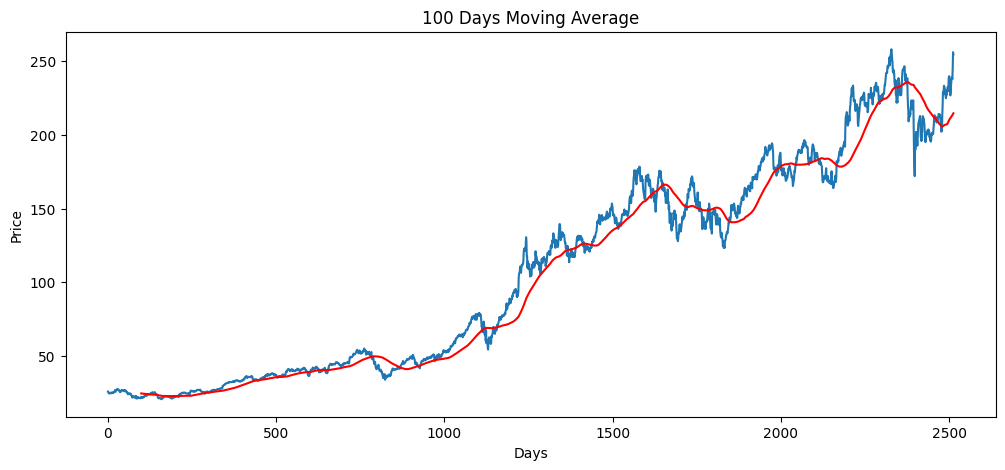

In [19]:
# Plotting the two graphs together (100 days)
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price');

### 200 Days Moving Average

In [20]:
df['MA_200'] = df.Close.rolling(200).mean()
df

,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2015-09-24,25.843441,25.955804,25.252413,25.450171,200878000,NaN,NaN
1,2015-09-25,25.778267,26.223224,25.623206,26.167043,224607600,NaN,NaN
2,2015-09-28,25.268141,25.746806,25.268141,25.585003,208436000,NaN,NaN
3,2015-09-29,24.508572,25.508602,24.238902,25.355788,293461600,NaN,NaN
4,2015-09-30,24.787237,25.065896,24.434418,24.758022,265892000,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2025-09-17,238.990005,240.100006,237.729996,238.970001,46508000,213.095340,221.153846
2510,2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600,213.386450,221.172752
2511,2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300,213.745181,221.217799
2512,2025-09-22,256.079987,256.640015,248.119995,248.300003,105517400,214.199038,221.304487


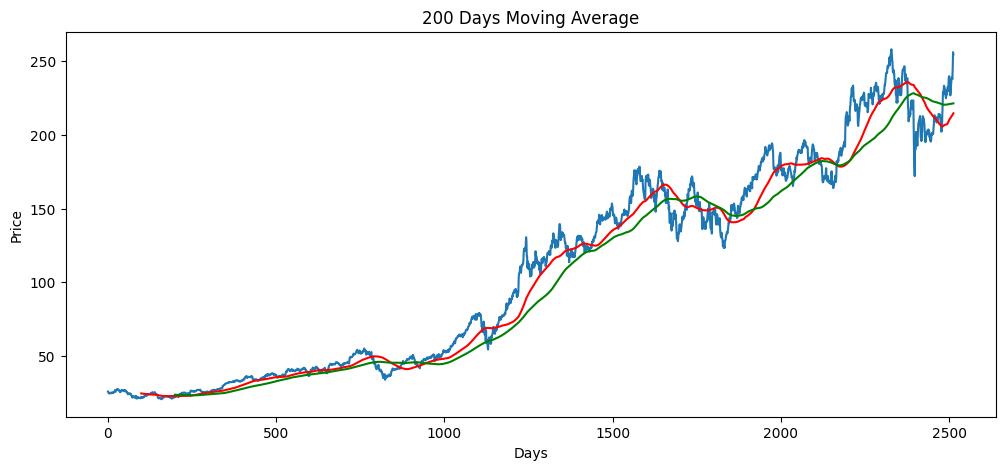

In [21]:
# Plotting the two graphs together (200 days)
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price');

### Calculating % changed in each trading session

In [22]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

,Close,Percentage Changed
0,25.843441,NaN
1,25.778267,-0.002522
2,25.268141,-0.019789
3,24.508572,-0.030060
4,24.787237,0.011370
...,...,...
2509,238.990005,0.003527
2510,237.880005,-0.004645
2511,245.500000,0.032033
2512,256.079987,0.043096


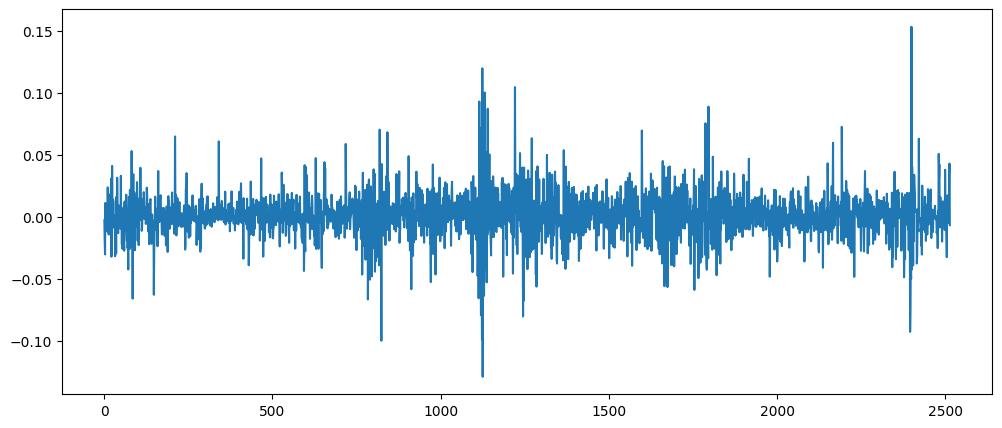

In [23]:
# Plotting the percentage changed
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

# 4. Data Preprocessing

In [25]:
df.shape

(2514, 9)

In [41]:
# Splitting data into training and testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

In [42]:
print(data_training)

           Close
0      25.843441
1      25.778267
2      25.268141
3      24.508572
4      24.787237
...          ...
1754  151.449310
1755  152.896439
1756  150.002136
1757  148.358109
1758  152.079346

[1759 rows x 1 columns]


In [44]:
print(data_testing)

           Close
1759  154.461746
1760  151.331177
1761  150.366440
1762  148.092300
1763  148.427017
...          ...
2509  238.990005
2510  237.880005
2511  245.500000
2512  256.079987
2513  254.429993

[755 rows x 1 columns]


In [46]:
# Standardize the datasets between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [47]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03307196],
       [0.03265899],
       [0.02942664],
       ...,
       [0.81978743],
       [0.80937026],
       [0.83294939]])

# 5. Sequence Creation

In [55]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1659, 100, 1)

In [56]:
y_train.shape

(1659,)

# 6. Model Building

In [61]:
import tensorflow as tf
print(tf.__version__)

2.18.1


In [62]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [64]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [65]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0398
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 6.3522e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.7799e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.4973e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 5.1431e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.8605e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 4.2389e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.0498e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 4.4671e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 4.1273e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.9556e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 3.8605e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 3.4881e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.9267e-04
Epoch 15/50
52/52 ━

In [66]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [68]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [73]:
data_training.tail(100)

,Close
1659,153.697250
1660,160.637543
1661,154.757446
1662,155.061752
1663,156.553864
...,...
1754,151.449310
1755,152.896439
1756,150.002136
1757,148.358109


In [74]:
data_testing

,Close
1759,154.461746
1760,151.331177
1761,150.366440
1762,148.092300
1763,148.427017
...,...
2509,238.990005
2510,237.880005
2511,245.500000
2512,256.079987


In [75]:
past_100_days = data_training.tail(100)

In [76]:
past_100_days

,Close
1659,153.697250
1660,160.637543
1661,154.757446
1662,155.061752
1663,156.553864
...,...
1754,151.449310
1755,152.896439
1756,150.002136
1757,148.358109


In [77]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

,Close
0,153.697250
1,160.637543
2,154.757446
3,155.061752
4,156.553864
...,...
850,238.990005
851,237.880005
852,245.500000
853,256.079987


In [78]:
# Standardize the data
input_data = scaler.fit_transform(final_df)
input_data

array([[2.25599926e-01],
       [2.77077219e-01],
       [2.33463574e-01],
       [2.35720662e-01],
       [2.46787897e-01],
       [2.94406082e-01],
       [2.27056287e-01],
       [2.32451998e-01],
       [1.94388890e-01],
       [2.12253873e-01],
       [1.53846641e-01],
       [1.25117237e-01],
       [1.58294722e-01],
       [1.46846647e-01],
       [1.73826222e-01],
       [1.12429648e-01],
       [8.71271286e-02],
       [8.88768443e-02],
       [1.29127663e-01],
       [1.09075422e-01],
       [1.10242050e-01],
       [1.34012946e-01],
       [1.76742792e-01],
       [1.70909539e-01],
       [1.69961569e-01],
       [1.88191094e-01],
       [1.45680019e-01],
       [1.51221728e-01],
       [1.69961569e-01],
       [1.64492632e-01],
       [1.25700551e-01],
       [8.55228453e-02],
       [4.72409665e-02],
       [5.36577604e-02],
       [7.31265734e-02],
       [3.39699499e-02],
       [4.49077104e-02],
       [7.63352532e-02],
       [7.25435989e-02],
       [9.38353531e-02],


In [79]:
input_data.shape

(855, 1)

In [81]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [82]:
x_test, y_test = np.array(x_test), np.array(y_test)

# 9. Making Predictions

In [84]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [85]:
y_predicted

array([[0.20567492],
       [0.22236423],
       [0.2230593 ],
       [0.21675129],
       [0.20336244],
       [0.19567671],
       [0.19621515],
       [0.19178392],
       [0.16307898],
       [0.12809952],
       [0.12084717],
       [0.1351575 ],
       [0.15069297],
       [0.1575845 ],
       [0.14210731],
       [0.12869768],
       [0.11636297],
       [0.10731369],
       [0.11726435],
       [0.11389142],
       [0.12139828],
       [0.13284309],
       [0.141092  ],
       [0.14352722],
       [0.1557113 ],
       [0.17217103],
       [0.19233051],
       [0.19419366],
       [0.17480981],
       [0.19560282],
       [0.20815216],
       [0.20393907],
       [0.17801495],
       [0.13803126],
       [0.11175846],
       [0.1016968 ],
       [0.10220509],
       [0.09181093],
       [0.12059303],
       [0.15795963],
       [0.17837386],
       [0.1914132 ],
       [0.19171566],
       [0.19427393],
       [0.19723965],
       [0.18704748],
       [0.18550155],
       [0.189

In [86]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [87]:
y_predicted

array([151.01091 , 153.261   , 153.35472 , 152.50426 , 150.69914 ,
       149.66293 , 149.73553 , 149.13809 , 145.26802 , 140.552   ,
       139.57423 , 141.50359 , 143.59811 , 144.52724 , 142.44057 ,
       140.63266 , 138.96967 , 137.74962 , 139.09119 , 138.63644 ,
       139.64853 , 141.19154 , 142.30368 , 142.632   , 144.2747  ,
       146.49384 , 149.21179 , 149.46298 , 146.84961 , 149.65297 ,
       151.34491 , 150.77689 , 147.28172 , 141.89104 , 138.34888 ,
       136.99232 , 137.06085 , 135.6595  , 139.53996 , 144.57782 ,
       147.33011 , 149.08812 , 149.12889 , 149.47382 , 149.87366 ,
       148.49953 , 148.29109 , 148.83192 , 147.94421 , 145.36151 ,
       142.18645 , 143.33733 , 145.20387 , 146.33218 , 146.30544 ,
       144.32233 , 141.83778 , 141.01073 , 140.71346 , 141.72922 ,
       143.12312 , 143.073   , 139.7941  , 136.28487 , 133.2724  ,
       131.5791  , 132.14319 , 131.91495 , 131.50453 , 130.53954 ,
       128.339   , 127.90626 , 128.21721 , 126.92605 , 126.122

In [88]:
y_test

array([154.46174622, 151.33117676, 150.36643982, 148.09230042,
       148.42701721, 149.40164185, 147.51144409, 140.26583862,
       136.05235291, 140.23632812, 143.8296051 , 144.12493896,
       143.16998291, 137.91297913, 138.23788452, 136.82020569,
       136.19017029, 140.76794434, 136.22955322, 140.19694519,
       141.51611328, 141.62438965, 141.16171265, 144.98139954,
       147.12753296, 149.97261047, 147.02908325, 142.54980469,
       153.31977844, 150.95709229, 148.30889893, 142.77619934,
       136.72177124, 136.45553589, 136.98802185, 137.5599823 ,
       132.99436951, 144.82746887, 147.61808777, 146.21786499,
       147.9533844 , 146.7207489 , 148.62394714, 149.18600464,
       145.95161438, 148.09141541, 148.96910095, 146.05023193,
       142.21434021, 139.20675659, 145.97129822, 146.24743652,
       145.75439453, 144.59080505, 140.92253113, 138.97993469,
       140.66616821, 140.18296814, 142.48060608, 143.44694519,
       141.21839905, 134.60166931, 132.63935852, 130.52

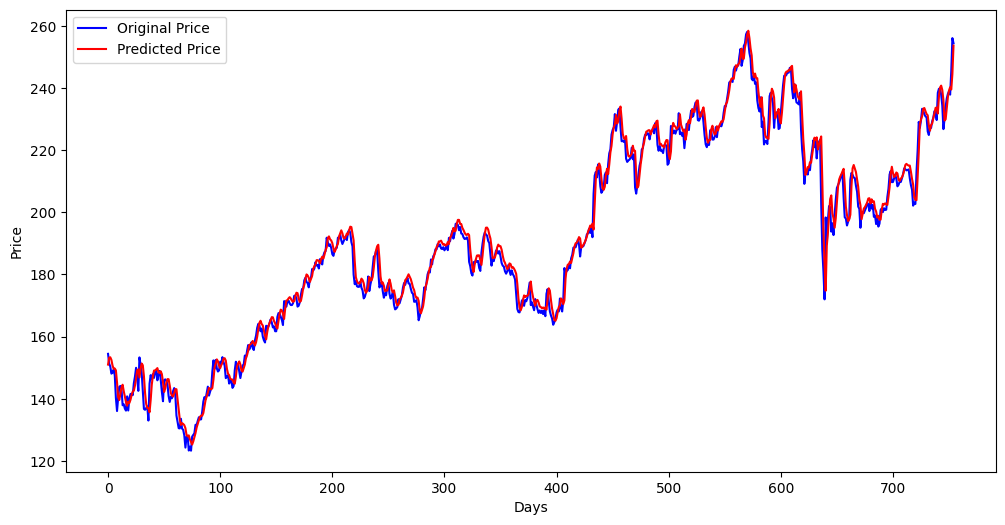

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

# 10. Model Evaluation

In [95]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 14.03973422018358


In [96]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 3.7469633331784262


In [98]:
# R-Squared
r2 =r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9861269611021471
